<a href="https://colab.research.google.com/github/mauriziomontis/esercizi_datascience/blob/main/esrcizio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercizio reti neurali

In [ ]:
import torch

In [ ]:
a = torch.tensor([1,2,3], device="cuda:0")
b = torch.tensor([4,5,6])

In [ ]:
a.device, b.device

(device(type='cuda', index=0), device(type='cpu'))

ogni tensore sta su un device --> per poter essere processati assieme devono essere sugli stessi device

In [14]:
DEVICE = "cuda:0"

a = torch.tensor([1,2,3.], device=DEVICE, requires_grad=True)
b = torch.tensor([4,5,6.], device=DEVICE, requires_grad=True)

ho aggunto il parametro requires_grad per usare il gradient function

In [15]:
a.device, b.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [16]:
s = torch.sum(a*b)

In [17]:
s

tensor(32., device='cuda:0', grad_fn=<SumBackward0>)

calcolo ora le derivate parziali (per la differenziazione automatica)

In [18]:
s.backward()

In [19]:
a.grad, b.grad

(tensor([4., 5., 6.], device='cuda:0'), tensor([1., 2., 3.], device='cuda:0'))

### importo torchvision per gli esercizi

In [37]:
import torchvision
import matplotlib.pyplot as plt

In [32]:
trainset = torchvision.datasets.MNIST(root="mnist", train=True, download=True)
testset = torchvision.datasets.MNIST(root="mnist", train=False, download=True)

In [33]:
trainset.data.shape

torch.Size([60000, 28, 28])

In [34]:
trainset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [35]:
grid = torchvision.utils.make_grid(trainset.data[:32].reshape(32,1,28,28))

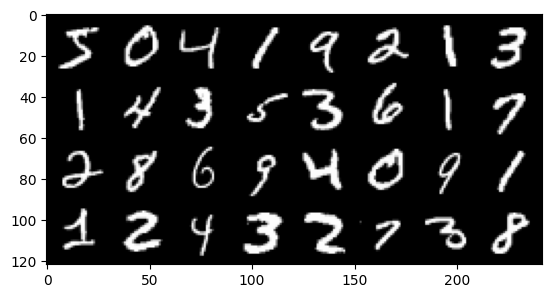

In [40]:
plt.imshow(grid.permute(dims=[1,2,0]), cmap="grey")

In [41]:
trainset.targets[:32]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])

## MPL - Low Level

faccio 3 strati (50-50-10)

In [71]:
from torch.nn.functional import relu, softmax, cross_entropy

In [72]:
class Mlp:
  def __init__(self, device) -> None:
    # nota: 28*28 = 784 elems

    # Strato 1
    self.w1 = torch.randn(size=(784, 50), requires_grad=True, device=device)
    self.b1 = torch.zeros(size=(1, 50), requires_grad=True, device=device)

    # Strato 2
    self.w2 = torch.randn(size=(50, 50), requires_grad=True, device=device)
    self.b2 = torch.zeros(size=(1, 50), requires_grad=True, device=device)

    # Strato 3
    self.w3 = torch.randn(size=(50, 10), requires_grad=True, device=device)
    self.b3 = torch.zeros(size=(1, 10), requires_grad=True, device=device)



  def forward(self, x):
    # quello che mi arriva: x.shape = (batch_size, 28, 28)
    x = x.reshape(-1, 784)            # stiro la griglia su un unico vettore

    # primo strato
    x =  x@self.w1 + self.b1
    x = relu(x)

    # secondo strato
    x =  x@self.w2 + self.b2
    x = relu(x)

    # ultimo strato
    x =  x@self.w3 + self.b3

    #return softmax(x, dim=-1)
    return x



In [73]:
DEVICE = "cpu"

In [63]:
mlp = Mlp(DEVICE)

In [67]:
y = mlp.forward(trainset.data[:32].float())

In [68]:
y

tensor([[ -87399.7031,   98640.5625,  -58570.5156, -143813.6875,  -46104.9453,
          -56943.3398,    4618.7280,   50911.4727,    4117.3677,   33301.9688],
        [ -19376.8008,  140150.0781,  -94773.1562, -100434.1953,  -14971.0391,
          -75577.0469,  -33729.5352,   36434.6953,  -13096.3721,   38549.4844],
        [ -49519.8633,   28604.5352,  -64127.0859,  -25039.8633,     814.5126,
          -98475.0703,    2574.8486,    1420.1378,  -10878.5225,   27080.9609],
        [ -11993.9678,   51908.8086,  -49936.5703,  -51780.6953,   -5103.9712,
          -92057.9531,    7499.4736,   49203.5703,   28058.3184,   31922.3672],
        [ -41860.6758,   -5167.3379,  -77192.4844,  -25596.7461,  -34995.4648,
         -100256.5625,  -65367.7773,    -867.8676,   48902.9727,   73453.8672],
        [ -41640.1758,  124162.3516, -144686.9688,  -57857.3789,  -50194.8008,
         -134907.8281,  -87419.8516,  -58942.8672,   72186.5547,   33404.2031],
        [ -50445.5938,   16087.3770,  -63543.4

causa inizializzazione pessima, mi è andato un saturazione


posso provare ad evitare la saturazione cercando di normalizzare (metodo becero)

In [69]:
y = mlp.forward(trainset.data[:32].float() / 255)

In [70]:
y

tensor([[-342.7440,  386.8257, -229.6883, -563.9752, -180.8038, -223.3072,
           18.1128,  199.6529,   16.1466,  130.5959],
        [ -75.9874,  549.6080, -371.6595, -393.8597,  -58.7100, -296.3805,
         -132.2728,  142.8811,  -51.3583,  151.1745],
        [-194.1956,  112.1747, -251.4788,  -98.1956,    3.1941, -386.1768,
           10.0974,    5.5692,  -42.6608,  106.1999],
        [ -47.0352,  203.5639, -195.8297, -203.0615,  -20.0156, -361.0116,
           29.4097,  192.9552,  110.0326,  125.1858],
        [-164.1594,  -20.2641, -302.7156, -100.3794, -137.2371, -393.1630,
         -256.3442,   -3.4035,  191.7764,  288.0544],
        [-163.2948,  486.9113, -567.3999, -226.8916, -196.8423, -529.0503,
         -342.8231, -231.1485,  283.0846,  130.9968],
        [-197.8259,   63.0878, -249.1901, -139.8815,  -15.0448, -257.1207,
          -54.1892,  122.3901,  -78.9050,  214.3878],
        [-398.0864,  468.4977, -228.2954, -507.6567, -137.4074, -566.5059,
          216.9340,  3

### addestramento

In [80]:
# immagini normalizzate
x_train = trainset.data.float() / 255
y_train = trainset.targets

In [81]:
epochs = 10
batch_size = 32
lr = 1e-3

losses = []
counter = 0

for epoch in range(epochs):
  # scorro tutto il dataset a batch di batch_size
  for i in range(0, len(x_train), batch_size):

    counter += 1
    # costruisco mini_batch
    x_batch = x_train[i:i+batch_size].to(DEVICE)
    y_batch = y_train[i:i+batch_size].to(DEVICE)


    # mando un unput il mini_batch alla rete
    y_batch_preds = mlp.forward(x_batch)

    # calcolo il costo
    loss = cross_entropy(y_batch_preds, y_batch)

    # calcolo gradiente
    loss.backward()
    losses.append(loss.detach().cpu().numpy().item())


    # Eseguo passo di discesa del gradiente
    with torch.no_grad():                 # non costruisce il grafo computazionale
      mlp.w1 -= lr*mlp.w1.grad
      mlp.b1 -= lr*mlp.b1.grad
      mlp.w2 -= lr*mlp.w2.grad
      mlp.b2 -= lr*mlp.b2.grad
      mlp.w3 -= lr*mlp.w3.grad
      mlp.b3 -= lr*mlp.b3.grad

      mlp.w1.grad.zero_()
      mlp.b1.grad.zero_()
      mlp.w2.grad.zero_()
      mlp.b2.grad.zero_()
      mlp.w3.grad.zero_()
      mlp.b3.grad.zero_()

    if counter % 100 == 0:
      print("Loss: {}".format(sum(losses)/len(losses)))
      losses = []

Loss: 0.8825681972503662
Loss: 0.8110600984096528
Loss: 0.8826000285148621
Loss: 0.8505221030116081
Loss: 0.9677538979053497
Loss: 0.916835313141346
Loss: 0.8518176501989365
Loss: 0.8424647942185401
Loss: 0.8910765007138253
Loss: 0.9890146219730377
Loss: 0.9089521393179893
Loss: 0.8519733312726021
Loss: 0.9551164799928665
Loss: 0.8896971741318702
Loss: 0.9097093719244004
Loss: 0.9187974280118942
Loss: 0.8751791903376579
Loss: 0.7872502112388611
Loss: 0.7309053355455398
Loss: 0.8309778052568436
Loss: 0.8070476388931275
Loss: 0.8709771892428398
Loss: 0.8504437249898911
Loss: 0.9503287848830223
Loss: 0.8954998624324798
Loss: 0.8325204738974571
Loss: 0.8479435387253761
Loss: 0.8739215302467346
Loss: 1.0243501168489457
Loss: 0.8538267594575882
Loss: 0.8335219112038612
Loss: 0.9446670651435852
Loss: 0.8998500239849091
Loss: 0.84493174046278
Loss: 0.9240805795788765
Loss: 0.8691255602240563
Loss: 0.7501060524582863
Loss: 0.788717939183116
Loss: 0.7850916028022766
Loss: 0.808167122900486
Loss:

In [82]:
x_test = testset.data.float() / 255
y_test = testset.targets


In [83]:
y_test_preds = mlp.forward(x_test)

In [84]:
y_test_preds.argmax(dim=1)

tensor([7, 0, 1,  ..., 9, 8, 6])

In [85]:
torch.mean((y_test_preds.argmax(dim=1) == y_test).float())

tensor(0.7394)